This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/Online_Retail.xlsx')

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# If there are missing values, handle them (e.g., by filling with mean/median)
df.fillna(df.mean(), inplace=True)

<ipython-input-4-13f0fd1e7027>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-4-13f0fd1e7027>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [5]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Aggregate quantities for each combination of CustomerID and StockCode
df_aggregated = df.groupby(['CustomerID', 'StockCode'], as_index=False)['Quantity'].sum()

# Create the pivot table
data = df_aggregated.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum')

# Replace NaN values with 0
data = data.fillna(0)
data.columns = data.columns.astype(str)
data.head(5)

StockCode,10002,10080,10120,10125,10133,10134,10135,11001,15030,15034,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
sum_quantity = df[(df['CustomerID'] == 17850.0) & (df['StockCode'] == '85123A')]['Quantity'].sum()
print(f"Total quantity of StockCode 85123A bought by CustomerID 17850.0: {sum_quantity}")


Total quantity of StockCode 85123A bought by CustomerID 17850.0: 122


In [8]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=5, metric='cosine')
model.fit(data)

NearestNeighbors(metric='cosine')

In [9]:
stock_code_to_product = df.set_index('StockCode')['Description'].to_dict()

In [10]:
customer_index = data.index.get_loc(17850)
distances, indices = model.kneighbors(data.iloc[customer_index, :].values.reshape(1, -1))
recommended_products = data.iloc[indices[0], :].sum().sort_values(ascending=False).index[:5]
for stock_code in recommended_products:
  try:
      stock_code=int(stock_code)
      if stock_code in stock_code_to_product.keys():
        print(f"StockCode: {stock_code} -> Product Name: {stock_code_to_product[stock_code]}")
      else:
        print(f"StockCode: {stock_code} not found in the original dataset")
  except:
      if stock_code in stock_code_to_product.keys():
        print(f"StockCode: {stock_code} -> Product Name: {stock_code_to_product[stock_code]}")
      else:
        print(f"StockCode: {stock_code} not found in the original dataset")


StockCode: 85123A -> Product Name: CREAM HANGING HEART T-LIGHT HOLDER
StockCode: 82482 -> Product Name: WOODEN PICTURE FRAME WHITE FINISH
StockCode: 82494L -> Product Name: WOODEN FRAME ANTIQUE WHITE 
StockCode: 71053 -> Product Name: WHITE MOROCCAN METAL LANTERN
StockCode: 84029G -> Product Name: KNITTED UNION FLAG HOT WATER BOTTLE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [11]:
customer_data = df[df['CustomerID'] == 17850]
recommended_list=[]
for stock_code in recommended_products:
  try:
    stock_code=int(stock_code)
    recommended_list.append(stock_code)
  except:
    recommended_list.append(stock_code)
stock_codes_list = customer_data['StockCode'].tolist()
cnt = 0
for rec in recommended_list:
  if rec in stock_codes_list:
    cnt+=1
print(f"Precision:{100*(cnt/len(recommended_list))}%")

Precision:100.0%


In [12]:
# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Extract year and month from 'InvoiceDate'
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
# Calculate total quantity sold per product
product_popularity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
# Calculate monthly total quantity sold
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum()

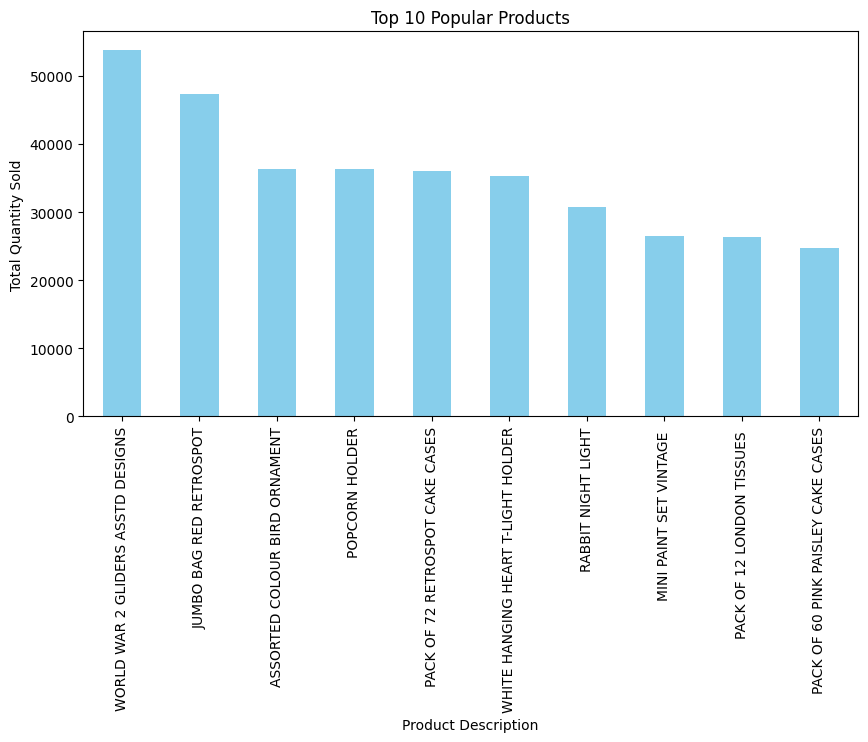

In [13]:
# Plotting product popularity
plt.figure(figsize=(10, 5))
product_popularity.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Popular Products')
plt.show()

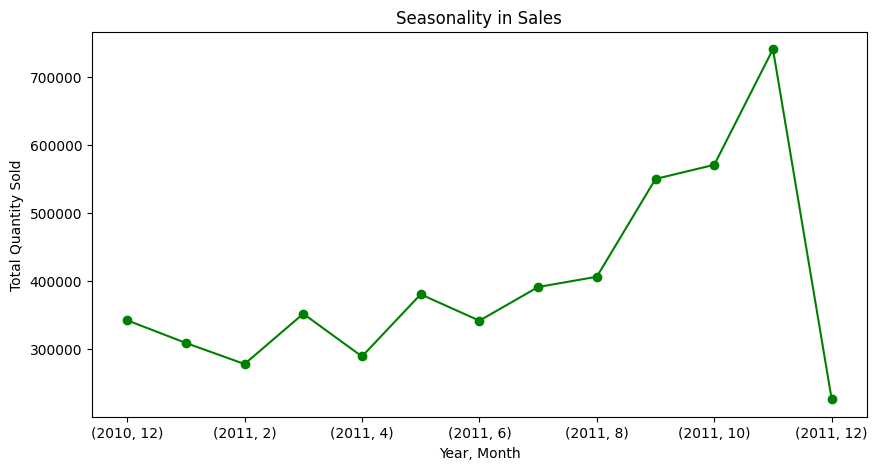

In [14]:
# Plotting seasonality
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.xlabel('Year, Month')
plt.ylabel('Total Quantity Sold')
plt.title('Seasonality in Sales')
plt.show()